In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sb

In [3]:
order_list = pd.read_excel('E_Commerce_Command_Center1.xlsm', engine='openpyxl')
order_details = pd.read_excel('E_Commerce_Command_Center2.xlsm', engine='openpyxl')
sales = pd.read_excel('E_Commerce_Command_Center3.xlsm', engine='openpyxl')

In [4]:
def get_date_features(df, date_col):
    df['year'] = df[date_col].apply(lambda x : x.year)
    df['month'] = df[date_col].apply(lambda x : x.month)
    df['day'] = df[date_col].apply(lambda x : x.day)

In [5]:
def convert_cols_lower(df):
    cols=[]
    for col in df.columns:
        col = col.lower().replace(" ","_")
        cols.append(col)
    df.columns = cols

In [6]:
convert_cols_lower(order_list)
convert_cols_lower(order_details) 
convert_cols_lower(sales)

In [7]:
order_list.head()

,order_id,order_date,customername,state,city
0,B-25601,2018-01-04 00:00:00,Bharat,Gujarat,Ahmedabad
1,B-25602,2018-01-04 00:00:00,Pearl,Maharashtra,Pune
2,B-25603,2018-03-04 00:00:00,Jahan,Madhya Pradesh,Bhopal
3,B-25604,2018-03-04 00:00:00,Divsha,Rajasthan,Jaipur
4,B-25605,2018-05-04 00:00:00,Kasheen,West Bengal,Kolkata


In [8]:
order_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      500 non-null    object
 1   order_date    500 non-null    object
 2   customername  500 non-null    object
 3   state         500 non-null    object
 4   city          500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [9]:
order_details.head()

,order_id,amount,profit,quantity,category,sub-category
0,B-25601,1275,-1148,7,Furniture,Bookcases
1,B-25601,66,-12,5,Clothing,Stole
2,B-25601,8,-2,3,Clothing,Hankerchief
3,B-25601,80,-56,4,Electronics,Electronic Games
4,B-25602,168,-111,2,Electronics,Phones


In [10]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      1500 non-null   object
 1   amount        1500 non-null   int64 
 2   profit        1500 non-null   int64 
 3   quantity      1500 non-null   int64 
 4   category      1500 non-null   object
 5   sub-category  1500 non-null   object
dtypes: int64(3), object(3)
memory usage: 70.4+ KB


In [11]:
order = pd.merge(order_list, order_details, on="order_id", how="outer")

In [12]:
order.head()

,order_id,order_date,customername,state,city,amount,profit,quantity,category,sub-category
0,B-25601,2018-01-04 00:00:00,Bharat,Gujarat,Ahmedabad,1275,-1148,7,Furniture,Bookcases
1,B-25601,2018-01-04 00:00:00,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,Stole
2,B-25601,2018-01-04 00:00:00,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Hankerchief
3,B-25601,2018-01-04 00:00:00,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games
4,B-25602,2018-01-04 00:00:00,Pearl,Maharashtra,Pune,168,-111,2,Electronics,Phones


In [13]:
sales.shape

(36, 3)

In [14]:
sales

,month_of_order_date,category,target
0,2022-04-18,Furniture,10400
1,2022-05-18,Furniture,10500
2,2022-06-18,Furniture,10600
3,2022-07-18,Furniture,10800
4,2022-08-18,Furniture,10900
5,2022-09-18,Furniture,11000
6,2022-10-18,Furniture,11100
7,2022-11-18,Furniture,11300
8,2022-12-18,Furniture,11400
9,2022-01-19,Furniture,11500


In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month_of_order_date  36 non-null     datetime64[ns]
 1   category             36 non-null     object        
 2   target               36 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 992.0+ bytes


In [16]:
sales.category.unique()

array(['Furniture', 'Clothing', 'Electronics'], dtype=object)

In [17]:
get_date_features(sales, "month_of_order_date")

In [18]:
sales.head()

,month_of_order_date,category,target,year,month,day
0,2022-04-18,Furniture,10400,2022,4,18
1,2022-05-18,Furniture,10500,2022,5,18
2,2022-06-18,Furniture,10600,2022,6,18
3,2022-07-18,Furniture,10800,2022,7,18
4,2022-08-18,Furniture,10900,2022,8,18


In [19]:
import warnings
warnings.filterwarnings('ignore')
order["order_date"] = order["order_date"].astype(np.datetime64)

In [20]:
order["order_date"].head()

0   2018-01-04
1   2018-01-04
2   2018-01-04
3   2018-01-04
4   2018-01-04
Name: order_date, dtype: datetime64[ns]

In [21]:
get_date_features(order, "order_date")

In [22]:
order

,order_id,order_date,customername,state,city,amount,profit,quantity,category,sub-category,year,month,day
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1275,-1148,7,Furniture,Bookcases,2018,1,4
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,Stole,2018,1,4
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Hankerchief,2018,1,4
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games,2018,1,4
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,168,-111,2,Electronics,Phones,2018,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,835,267,5,Electronics,Phones,2019,3,30
1496,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,2366,552,5,Clothing,Trousers,2019,3,30
1497,B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,828,230,2,Furniture,Chairs,2019,3,31
1498,B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,34,10,2,Clothing,T-shirt,2019,3,31


# Profit based on order id

In [23]:
order_id_profit_group = order[["order_id", "profit"]].groupby("order_id").sum()

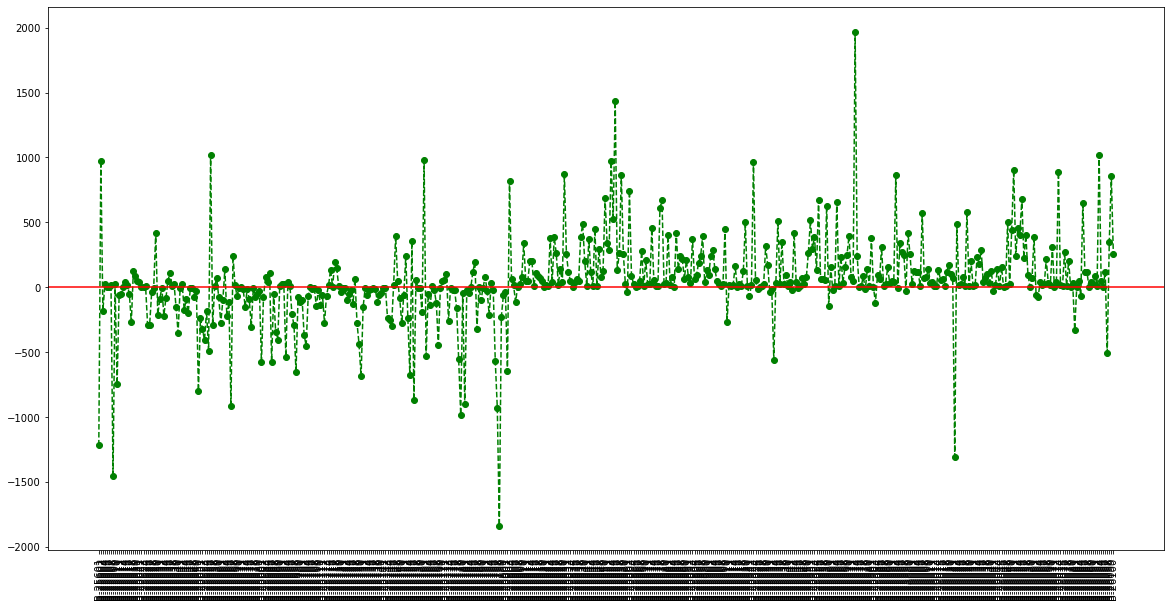

In [24]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(order_id_profit_group["profit"], "go--")
plt.axhline(y = 0.5, color = 'r', linestyle = '-')

# Above graph clearly show that very few orders are able to make profit above 500 rs. Lets verify with data

(array([  2.,   2.,   7.,  24., 292., 136.,  23.,  12.,   1.,   1.]),
 array([-1836. , -1455.4, -1074.8,  -694.2,  -313.6,    67. ,   447.6,
          828.2,  1208.8,  1589.4,  1970. ]),
 <BarContainer object of 10 artists>)

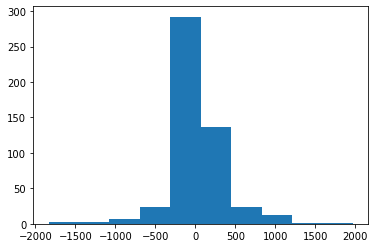

In [25]:
plt.hist(order_id_profit_group["profit"])

In [26]:
order_id_profit_group[order_id_profit_group["profit"] <= 0].shape

(170, 1)

In [27]:
order_id_profit_group[(order_id_profit_group["profit"] > 0) & (order_id_profit_group["profit"] <= 500)].shape

(299, 1)

# Only 31 orders out of 500 orders are able to make profit above rs. 500. Clearly depicts that sales team has to work hard for making the sales profitable

In [28]:
loss = []
for i in order["profit"]:
    if i<0:
        loss.append(i*-1)
    else:
        loss.append(0)
order["loss_col"] = loss
order

,order_id,order_date,customername,state,city,amount,profit,quantity,category,sub-category,year,month,day,loss_col
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1275,-1148,7,Furniture,Bookcases,2018,1,4,1148
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,Stole,2018,1,4,12
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Hankerchief,2018,1,4,2
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games,2018,1,4,56
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,168,-111,2,Electronics,Phones,2018,1,4,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,835,267,5,Electronics,Phones,2019,3,30,0
1496,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,2366,552,5,Clothing,Trousers,2019,3,30,0
1497,B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,828,230,2,Furniture,Chairs,2019,3,31,0
1498,B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,34,10,2,Clothing,T-shirt,2019,3,31,0


# Profit over a period(monthly)

In [29]:
profit_yearly_monthly =order[["year","profit","month"]].groupby(["year","month"]).sum()

In [30]:
profit_yearly_monthly

profit
year month        
2018 1       -3296
     2         685
     3         669
     4       -1043
     5        -891
     6       -3759
     7       -2065
     8       -1059
     9       -3509
     10       5979
     11       4955
     12       1535
2019 1        8655
     2        2291
     3        6633
     4        1295
     5         943
     6         700
     7         975
     8         594
     9        1597
     10       1892
     11        122
     12         57

In [31]:
data_2018=order.loc[order['year'] == 2018]

In [32]:
data_2019=order.loc[order['year'] == 2019]

In [33]:
monthly_profit_2018 =data_2018[["month","profit"]].groupby(["month"]).sum()

In [34]:
monthly_profit_2019 =data_2019[["month","profit"]].groupby(["month"]).sum()

In [35]:
monthly_profit_2018

,profit
month,
1,-3296
2,685
3,669
4,-1043
5,-891
6,-3759
7,-2065
8,-1059
9,-3509


In [36]:
monthly_profit_2019

,profit
month,
1,8655
2,2291
3,6633
4,1295
5,943
6,700
7,975
8,594
9,1597


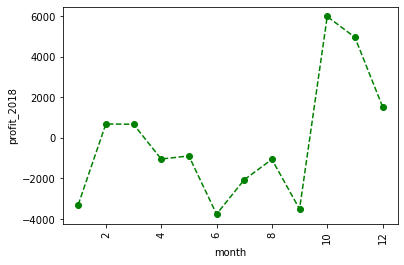

In [37]:
plt.xticks(rotation=90)
plt.xlabel("month")
plt.ylabel("profit_2018")
plt.plot(monthly_profit_2018["profit"], "go--")

# Sales started in loss in the inital months and with time it incresed gradually in the end of year.

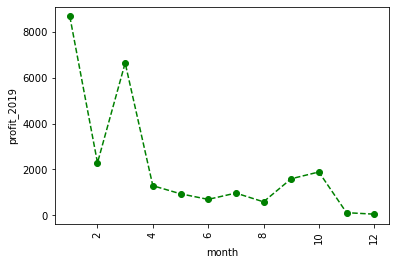

In [38]:
plt.xticks(rotation=90)
plt.xlabel("month")
plt.ylabel("profit_2019")
plt.plot(monthly_profit_2019["profit"], "go--")

## Here we can see clearly the profit is decreasing over the consecutive years.
### The Profit in the initial part of the year is good but it is decreasing with time. We can also see that the February month is less on profit as compared to all and also its profit is almost same in both the years so in that month sales team need to give attention
### From month 4 to 8 also sales were low and then it again spiked  a bit and then again experienced a sudden downfall in the month of november.

## We can analyze further like which category or subcategory is responsible for this kind of trend

# State wise profit

In [39]:
profit_state =order[["state","profit"]].groupby(["state"]).sum()

In [40]:
profit_state

,profit
state,
Andhra Pradesh,-496
Bihar,-321
Delhi,2987
Goa,370
Gujarat,465
Haryana,1325
Himachal Pradesh,656
Jammu and Kashmir,8
Karnataka,645


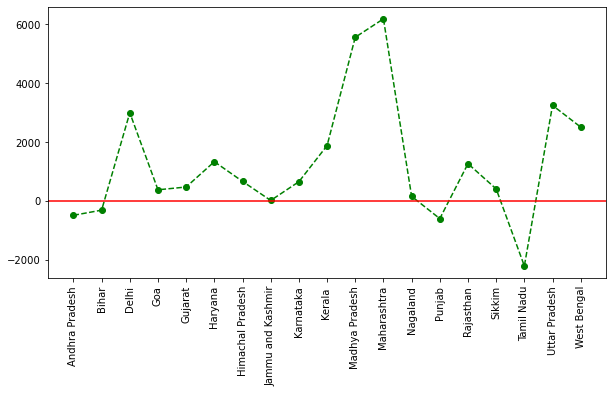

In [41]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.plot(profit_state["profit"], "go--")
plt.axhline(y = 0.5, color = 'r', linestyle = '-')

# The states those who are giving more losses need focus like Tamil Nadu 

# We can further dive into categories or sub categories that are responsible for the loss in Tamil Nadu

In [42]:
profit_state_2018 =data_2018[["state","profit"]].groupby(["state"]).sum()

In [43]:
profit_state_2019 =data_2019[["state","profit"]].groupby(["state"]).sum()

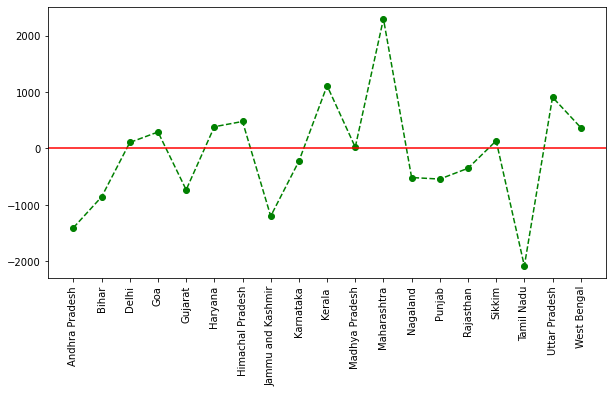

In [44]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.plot(profit_state_2018["profit"], "go--")
plt.axhline(y = 0.5, color = 'r', linestyle = '-')

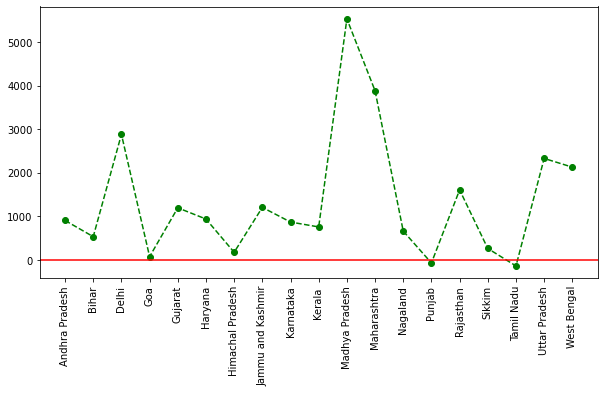

In [45]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.plot(profit_state_2019["profit"], "go--")
plt.axhline(y = 0.5, color = 'r', linestyle = '-')

# As we noticed in further breakdown the loss has been taken care of in 2019.

# Tamil Nadu and Punjab need focus as these states are still running in loss
# Profit of goa has reduced from 2018 to 2019 so it also need focus

In [46]:
revenue_category =order[["category","profit"]].groupby(["category"]).sum()

In [47]:
revenue_category

,profit
category,
Clothing,11163
Electronics,10494
Furniture,2298


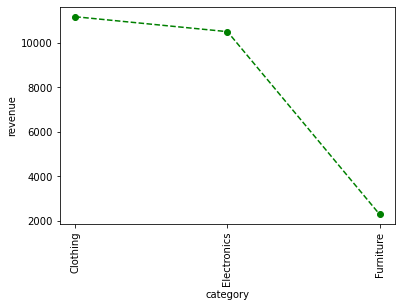

In [48]:
plt.xticks(rotation=90)
plt.xlabel("category")
plt.ylabel("revenue")
plt.plot(revenue_category["profit"], "go--")

# Above graph depicts that we are getting least profit in Furniture category 
# Now we will seperate out profit and loss from this revenue to analyze which category is giving more loss

In [49]:
profit_col = []
for i in order["profit"]:
    if i>=0:
        profit_col.append(i)
    else:
        profit_col.append(0)
order["profit_col"] = profit_col
order

,order_id,order_date,customername,state,city,amount,profit,quantity,category,sub-category,year,month,day,loss_col,profit_col
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1275,-1148,7,Furniture,Bookcases,2018,1,4,1148,0
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,Stole,2018,1,4,12,0
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Hankerchief,2018,1,4,2,0
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games,2018,1,4,56,0
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,168,-111,2,Electronics,Phones,2018,1,4,111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,835,267,5,Electronics,Phones,2019,3,30,0,267
1496,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,2366,552,5,Clothing,Trousers,2019,3,30,0,552
1497,B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,828,230,2,Furniture,Chairs,2019,3,31,0,230
1498,B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,34,10,2,Clothing,T-shirt,2019,3,31,0,10


In [50]:
profit_category =order[["category","profit_col"]].groupby(["category"]).sum()

In [51]:
loss_category =order[["category","loss_col"]].groupby(["category"]).sum()

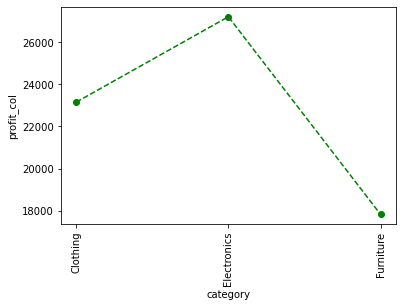

In [52]:
plt.xticks(rotation=90)
plt.xlabel("category")
plt.ylabel("profit_col")
plt.plot(profit_category["profit_col"], "go--")

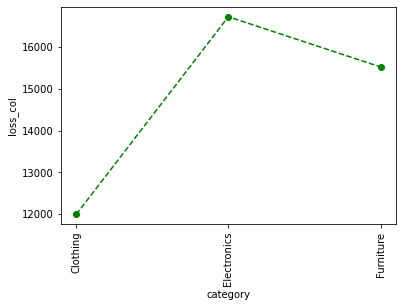

In [53]:
plt.xticks(rotation=90)
plt.xlabel("category")
plt.ylabel("loss_col")
plt.plot(loss_category["loss_col"], "go--")

# From the above two graphs we can depict that the company is getting least profit in Furniture category so it need to be taken care of , we can go further and check like which state or which sub category is giving more loss in this category

In [54]:
sub_category_loss =order[["category","loss_col","sub-category"]].groupby(["category","sub-category"]).sum()


In [55]:
sub_category_loss

loss_col
category    sub-category              
Clothing    Hankerchief            973
            Kurti                  413
            Leggings               172
            Saree                 7034
            Shirt                  367
            Skirt                  154
            Stole                 1287
            T-shirt                192
            Trousers              1401
Electronics Accessories           1307
            Electronic Games      5571
            Phones                5481
            Printers              4363
Furniture   Bookcases             5322
            Chairs                3504
            Furnishings           1508
            Tables                5187

# From above datafram we can say that Bookcases and Tables are giving more loss in Furniture category.
## In Electronics Electronic Games and Phones need attention as they are also giving huge loss.
## In Clothing category the majority of the loss is given by Saree so it need to be taken care of as by discarding this product or improving sales will may give us profit.

In [56]:
sub_category_revenue =order[["category","profit","sub-category"]].groupby(["category","sub-category"]).sum()


In [57]:
sub_category_revenue

profit
category    sub-category            
Clothing    Hankerchief         2098
            Kurti                181
            Leggings             260
            Saree                352
            Shirt               1131
            Skirt                235
            Stole               2559
            T-shirt             1500
            Trousers            2847
Electronics Accessories         3559
            Electronic Games   -1236
            Phones              2207
            Printers            5964
Furniture   Bookcases           4888
            Chairs               577
            Furnishings          844
            Tables             -4011

## The above dataframe clearly say as in Furniture if company stop selling Tables then the loss will be decreased, same case with the Electronic games in Electronics.
## These two sub categories need attention.




In [58]:
category_stateWise_profit =order[["category","profit","state"]].groupby(["category","state"]).sum()


In [59]:
category_stateWise_profit

profit
category    state                    
Clothing    Andhra Pradesh        596
            Bihar                   1
            Delhi                 822
            Goa                    67
            Gujarat               362
            Haryana                67
            Himachal Pradesh      146
            Jammu and Kashmir     -70
            Karnataka            -535
            Kerala                978
            Madhya Pradesh       1061
            Maharashtra          2516
            Nagaland              237
            Punjab               1452
            Rajasthan             450
            Sikkim                403
            Tamil Nadu            -98
            Uttar Pradesh        1186
            West Bengal          1522
Electronics Andhra Pradesh        476
            Bihar                -814
            Delhi                1527
            Goa                   216
            Gujarat               158
            Haryana               492
            Himachal Pradesh      473
            Jammu and Kashmir      23
            Karnataka             514
            Kerala                536
            Madhya Pradesh       3799
            Maharashtra          2611
            Nagaland            -1033
            Punjab              -2132
            Rajasthan             202
            Sikkim                 64
            Tamil Nadu            369
            Uttar Pradesh        2311
            West Bengal           702
Furniture   Andhra Pradesh      -1568
            Bihar                 492
            Delhi                 638
            Goa                    87
            Gujarat               -55
            Haryana               766
            Himachal Pradesh       37
            Jammu and Kashmir      55
            Karnataka             666
            Kerala                357
            Madhya Pradesh        691
            Maharashtra          1049
            Nagaland              944
            Punjab                 71
            Rajasthan             605
            Sikkim                -66
            Tamil Nadu          -2487
            Uttar Pradesh        -260
            West Bengal           276

# From above datafram we can say that in some states some categories are giving huge amount of loss so these categories in particular states need to be focused more:-
### those categories in respective states need attention. like:-
## In Clothing :- 
### Karnataka is giving huge loss and J&K and Tamil Nadu is also in loss.
## In Electronics :- 
### Bihar,Nagaland and Punjab are in loss.
## In Furniture :- 
### Andhra Pradesh,Tamil Nadu are giving high loss and Gujarat is also in loss.

In [60]:
revenue_category

,profit
category,
Clothing,11163
Electronics,10494
Furniture,2298


# Clothing category is contributing highest in the company as profit is also high in this category .
## We can see that in clothing the majority contributing sub categories are Stole,Hankerchief and Trousers.

# The least contributing category is Furniture.
### In Furniture Bookcases are contributing the highest and Tables subcategory is giving loss

In [61]:
sales

,month_of_order_date,category,target,year,month,day
0,2022-04-18,Furniture,10400,2022,4,18
1,2022-05-18,Furniture,10500,2022,5,18
2,2022-06-18,Furniture,10600,2022,6,18
3,2022-07-18,Furniture,10800,2022,7,18
4,2022-08-18,Furniture,10900,2022,8,18
5,2022-09-18,Furniture,11000,2022,9,18
6,2022-10-18,Furniture,11100,2022,10,18
7,2022-11-18,Furniture,11300,2022,11,18
8,2022-12-18,Furniture,11400,2022,12,18
9,2022-01-19,Furniture,11500,2022,1,19


In [62]:
sales_target =sales[["category","target","month"]].groupby(["category","month"]).sum()

In [63]:
sales_target

target
category    month        
Clothing    1       16000
            2       16000
            3       16000
            4       12000
            5       12000
            6       12000
            7       14000
            8       14000
            9       14000
            10      16000
            11      16000
            12      16000
Electronics 1       16000
            2       16000
            3       16000
            4        9000
            5        9000
            6        9000
            7        9000
            8        9000
            9        9000
            10       9000
            11       9000
            12       9000
Furniture   1       11500
            2       11600
            3       11800
            4       10400
            5       10500
            6       10600
            7       10800
            8       10900
            9       11000
            10      11100
            11      11300
            12      11400

In [64]:
current_sales=order[["category","amount","month"]].groupby(["category","month"]).sum()

In [65]:
current_sales

amount
category    month        
Clothing    1       17222
            2        6169
            3       17932
            4       13397
            5        8489
            6        8322
            7        5215
            8       15419
            9        9785
            10      14838
            11      16384
            12       5882
Electronics 1       30261
            2       10456
            3       18491
            4        9584
            5       10375
            6        8257
            7        8840
            8       18322
            9        8009
            10      18788
            11      11823
            12      12061
Furniture   1       21000
            2        5835
            3       10711
            4       14268
            5        5948
            6        4219
            7        6743
            8       18085
            9        7999
            10      13279
            11      12886
            12       6208

In [66]:
sales_2018=data_2018[["category","amount","month"]].groupby(["category","month"]).sum()

In [67]:
sales_2019=data_2019[["category","amount","month"]].groupby(["category","month"]).sum()

In [68]:
sales_2018

amount
category    month        
Clothing    1        5355
            2        1662
            3        3521
            4       10743
            5        6986
            6        7238
            7        4020
            8       13270
            9        8414
            10      11761
            11      15862
            12       5769
Electronics 1        7624
            2        3763
            3        3345
            4        8857
            5        8759
            6        6546
            7        6413
            8       16740
            9        5068
            10      15537
            11      10531
            12      11915
Furniture   1        5056
            2        1141
            3         568
            4        6570
            5        4677
            6        3622
            7        5249
            8       15259
            9        6728
            10       5460
            11      12465
            12       6208

In [69]:
sales_2019

amount
category    month        
Clothing    1       11867
            2        4507
            3       14411
            4        2654
            5        1503
            6        1084
            7        1195
            8        2149
            9        1371
            10       3077
            11        522
            12        113
Electronics 1       22637
            2        6693
            3       15146
            4         727
            5        1616
            6        1711
            7        2427
            8        1582
            9        2941
            10       3251
            11       1292
            12        146
Furniture   1       15944
            2        4694
            3       10143
            4        7698
            5        1271
            6         597
            7        1494
            8        2826
            9        1271
            10       7819
            11        421

In [70]:
order

,order_id,order_date,customername,state,city,amount,profit,quantity,category,sub-category,year,month,day,loss_col,profit_col
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1275,-1148,7,Furniture,Bookcases,2018,1,4,1148,0
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,Stole,2018,1,4,12,0
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Hankerchief,2018,1,4,2,0
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games,2018,1,4,56,0
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,168,-111,2,Electronics,Phones,2018,1,4,111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,835,267,5,Electronics,Phones,2019,3,30,0,267
1496,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,2366,552,5,Clothing,Trousers,2019,3,30,0,552
1497,B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,828,230,2,Furniture,Chairs,2019,3,31,0,230
1498,B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,34,10,2,Clothing,T-shirt,2019,3,31,0,10


In [71]:
sales_furniture = sales[sales['category'] == 'Furniture']
sales_furniture = sales_furniture.sort_values('month')

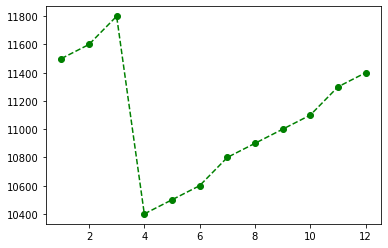

In [72]:
plt.plot(sales_furniture.month, sales_furniture.target, "go--")

# Sales target are gradually increasing in first quarter followed by a dip at start of second quarter(need further anaysis why it was set like this). After second quarter it is gradually increasing. If we see it for continuous years then after year end the targets increase immediately at the beginning of year.

In [73]:
sales_electronics = sales[sales['category'] == 'Electronics']
sales_electronics = sales_electronics.sort_values('month')

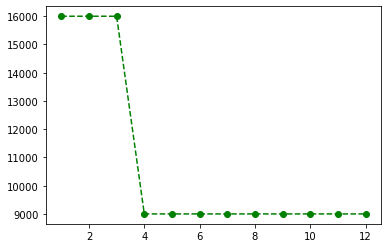

In [74]:
plt.plot(sales_electronics.month, sales_electronics.target, "go--")

# Target for first quarter is kept high followed by same target through out the year. Its surprising why even for year end the target is kept same instead of increased target.(Needs further analysis)

In [75]:
sales_clothing = sales[sales['category'] == 'Clothing']
sales_clothing = sales_clothing.sort_values('month')

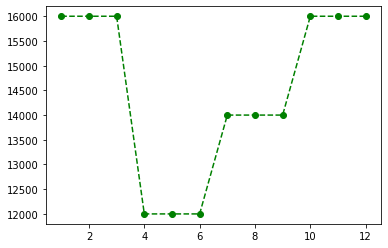

In [76]:
plt.plot(sales_clothing.month, sales_clothing.target, "go--")

# Clothing target looks like sales target is fixed for each quarter. For first quarter(Jan-Mar) and last quarter(Oct-Dec) it is high. Second quarter is kept lowest followed by gradually increasing target for third quarter

# We cannot analyze the sales trend as given target is of year 2022 and we are given data for 2018-19 . 

In [77]:
matrix = order_details.corr()

In [78]:
matrix

,amount,profit,quantity
amount,1.000000,0.242045,0.352052
profit,0.242045,1.000000,0.002441
quantity,0.352052,0.002441,1.000000


In [79]:
matrix_2 = order.corr()
matrix_2

,amount,profit,quantity,year,month,day,loss_col,profit_col
amount,1.000000,0.242045,0.352052,0.013041,0.018704,-0.001970,0.256642,0.638762
profit,0.242045,1.000000,0.002441,0.141277,-0.004204,0.013633,-0.757760,0.727543
quantity,0.352052,0.002441,1.000000,-0.001382,-0.017150,0.019026,0.184702,0.197914
year,0.013041,0.141277,-0.001382,1.000000,-0.498481,-0.107618,-0.125866,0.083007
month,0.018704,-0.004204,-0.017150,-0.498481,1.000000,-0.095391,0.004269,-0.001919
day,-0.001970,0.013633,0.019026,-0.107618,-0.095391,1.000000,-0.010078,0.010184
loss_col,0.256642,-0.757760,0.184702,-0.125866,0.004269,-0.010078,1.000000,-0.103624
profit_col,0.638762,0.727543,0.197914,0.083007,-0.001919,0.010184,-0.103624,1.000000


# From above correlation matrix we do not see any strong relation between amount, profit and quantity. It looks like they are independent data. Very small relation is seen between amount and quantity. Instead it was expected to have a strong relation between amount and quantity as generally if quantity increases the sales amount should increase.

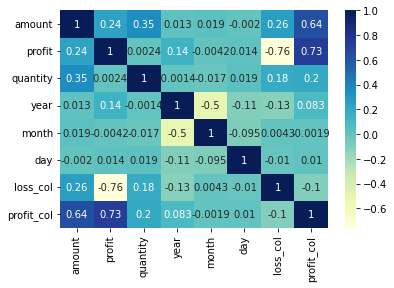

In [80]:
import seaborn as sb

# plotting correlation heatmap
dataplot = sb.heatmap(order.corr(), cmap="YlGnBu", annot=True)

In [83]:
sub_category_analysis_2018 =data_2018[["sub-category","profit","month"]].groupby(["sub-category","month"]).sum()

In [85]:
sub_category_analysis_2019 =data_2019[["sub-category","profit","month"]].groupby(["sub-category","month"]).sum()

In [86]:
sub_category_analysis_2019

profit
sub-category month        
Accessories  1         613
             2         490
             3         465
             4          81
             5         382
...                    ...
Trousers     1         175
             2          93
             3        1179
             4         209
             10         87

[138 rows x 1 columns]

In [87]:
sales_furniture

,month_of_order_date,category,target,year,month,day
9,2022-01-19,Furniture,11500,2022,1,19
10,2022-02-19,Furniture,11600,2022,2,19
11,2022-03-19,Furniture,11800,2022,3,19
0,2022-04-18,Furniture,10400,2022,4,18
1,2022-05-18,Furniture,10500,2022,5,18
2,2022-06-18,Furniture,10600,2022,6,18
3,2022-07-18,Furniture,10800,2022,7,18
4,2022-08-18,Furniture,10900,2022,8,18
5,2022-09-18,Furniture,11000,2022,9,18
6,2022-10-18,Furniture,11100,2022,10,18


In [88]:
furniture_tables = order[order['sub-category'] == 'Tables']

In [89]:
furniture_tables

,order_id,order_date,customername,state,city,amount,profit,quantity,category,sub-category,year,month,day,loss_col,profit_col
22,B-25608,2018-08-04,Aarushi,Tamil Nadu,Chennai,1364,-1864,5,Furniture,Tables,2018,8,4,1864,0
205,B-25669,2018-05-25,Piyali,Sikkim,Gangtok,610,-66,2,Furniture,Tables,2018,5,25,66,0
221,B-25676,2018-01-06,Chandni,Rajasthan,Jaipur,674,-187,2,Furniture,Tables,2018,1,6,187,0
250,B-25686,2018-11-06,Pooja,Himachal Pradesh,Simla,1829,-56,6,Furniture,Tables,2018,11,6,56,0
307,B-25702,2018-06-27,Shaily,Maharashtra,Mumbai,941,-203,3,Furniture,Tables,2018,6,27,203,0
529,B-25779,2018-12-09,Savi,Madhya Pradesh,Indore,1361,-980,3,Furniture,Tables,2018,12,9,980,0
549,B-25786,2018-09-19,Abhishek,Karnataka,Bangalore,623,-192,3,Furniture,Tables,2018,9,19,192,0
585,B-25797,2018-09-30,Sauptik,Madhya Pradesh,Indore,1630,-802,5,Furniture,Tables,2018,9,30,802,0
620,B-25806,2018-06-10,Dhanraj,Madhya Pradesh,Indore,632,-114,4,Furniture,Tables,2018,6,10,114,0
736,B-25852,2018-07-11,Soumyabrata,Andhra Pradesh,Hyderabad,869,67,4,Furniture,Tables,2018,7,11,0,67


In [90]:
furniture_tables_2018 = data_2018[data_2018['sub-category'] == 'Tables']

In [91]:
furniture_tables_2019 = data_2019[data_2019['sub-category'] == 'Tables']

In [92]:
furniture_tables_2019['profit'].sum()

629

In [93]:
furniture_tables_2019

,order_id,order_date,customername,state,city,amount,profit,quantity,category,sub-category,year,month,day,loss_col
1167,B-25993,2019-03-02,Harshal,Delhi,Delhi,4363,305,5,Furniture,Tables,2019,3,2,0
1215,B-26003,2019-08-02,Hitesh,Madhya Pradesh,Bhopal,1745,122,2,Furniture,Tables,2019,8,2,0
1309,B-26048,2019-04-03,Parth,Maharashtra,Pune,1461,202,5,Furniture,Tables,2019,4,3,0


In [94]:
furniture_tables_2018 = furniture_tables_2018.sort_values('month')

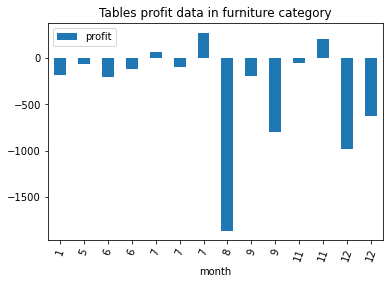

In [95]:
furniture_tables_2018.plot.bar(x="month", y="profit", rot=70, title="Tables profit data in furniture category");

plt.show(block=True);

In [96]:
furniture_tables_2019 = furniture_tables_2019.sort_values('month')

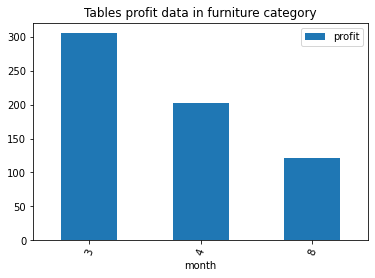

In [97]:
furniture_tables_2019.plot.bar(x="month", y="profit", rot=70, title="Tables profit data in furniture category");

plt.show(block=True);

## loss of 2019 in different categories

In [98]:
loss_category_2019 =data_2019[["category","loss_col"]].groupby(["category"]).sum()

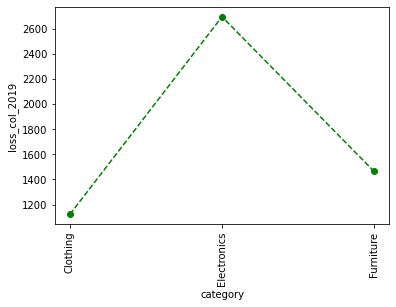

In [99]:
plt.xticks(rotation=90)
plt.xlabel("category")
plt.ylabel("loss_col_2019")
plt.plot(loss_category_2019["loss_col"], "go--")

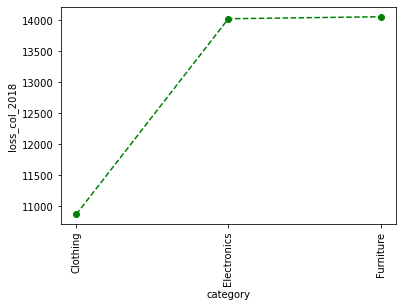

In [100]:
loss_category_2018 =data_2018[["category","loss_col"]].groupby(["category"]).sum()
plt.xticks(rotation=90)
plt.xlabel("category")
plt.ylabel("loss_col_2018")
plt.plot(loss_category_2018["loss_col"], "go--")

# electronics sub-category analysis

In [101]:
electronics_sub_category = order[order['sub-category'] == 'Electronic Games']

In [102]:
Electronics_Games_2018 = data_2018[data_2018['sub-category'] == 'Electronic Games']

In [103]:
Electronics_Games_2019= data_2019[data_2019['sub-category'] == 'Electronic Games']

In [104]:
electronics_sub_category

,order_id,order_date,customername,state,city,amount,profit,quantity,category,sub-category,year,month,day,loss_col,profit_col
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games,2018,1,4,56,0
26,B-25609,2018-09-04,Jitesh,Uttar Pradesh,Lucknow,485,29,4,Electronics,Electronic Games,2018,9,4,0,29
38,B-25614,2018-04-13,Vandana,Himachal Pradesh,Simla,98,-12,2,Electronics,Electronic Games,2018,4,13,12,0
44,B-25617,2018-04-17,Sagar,Nagaland,Kohima,305,-270,5,Electronics,Electronic Games,2018,4,17,270,0
49,B-25621,2018-04-20,Deepak,Madhya Pradesh,Bhopal,233,-10,5,Electronics,Electronic Games,2018,4,20,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,B-26072,2019-03-20,Sweta,Maharashtra,Mumbai,313,44,3,Electronics,Electronic Games,2019,3,20,0,44
1427,B-26078,2019-03-22,Kasheen,West Bengal,Kolkata,557,111,2,Electronics,Electronic Games,2019,3,22,0,111
1443,B-26084,2019-03-25,Anita,Kerala,Thiruvananthapuram,209,-63,4,Electronics,Electronic Games,2019,3,25,63,0
1453,B-26087,2019-03-26,Vandana,Himachal Pradesh,Simla,311,40,1,Electronics,Electronic Games,2019,3,26,0,40


In [105]:
Electronics_Games_2018

,order_id,order_date,customername,state,city,amount,profit,quantity,category,sub-category,year,month,day,loss_col
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games,2018,1,4,56
26,B-25609,2018-09-04,Jitesh,Uttar Pradesh,Lucknow,485,29,4,Electronics,Electronic Games,2018,9,4,0
38,B-25614,2018-04-13,Vandana,Himachal Pradesh,Simla,98,-12,2,Electronics,Electronic Games,2018,4,13,12
44,B-25617,2018-04-17,Sagar,Nagaland,Kohima,305,-270,5,Electronics,Electronic Games,2018,4,17,270
49,B-25621,2018-04-20,Deepak,Madhya Pradesh,Bhopal,233,-10,5,Electronics,Electronic Games,2018,4,20,10
50,B-25621,2018-04-20,Deepak,Madhya Pradesh,Bhopal,228,63,3,Electronics,Electronic Games,2018,4,20,0
98,B-25643,2018-04-29,Kirti,Jammu and Kashmir,Kashmir,263,-63,2,Electronics,Electronic Games,2018,4,29,63
99,B-25643,2018-04-29,Kirti,Jammu and Kashmir,Kashmir,36,-7,1,Electronics,Electronic Games,2018,4,29,7
117,B-25650,2018-06-05,Chirag,Maharashtra,Mumbai,925,-447,5,Electronics,Electronic Games,2018,6,5,447
150,B-25654,2018-10-05,Sabah,Maharashtra,Mumbai,269,-86,2,Electronics,Electronic Games,2018,10,5,86


In [106]:
Electronics_Games_2019

,order_id,order_date,customername,state,city,amount,profit,quantity,category,sub-category,year,month,day,loss_col
969,B-25930,2019-03-01,Monica,Punjab,Chandigarh,351,-94,5,Electronics,Electronic Games,2019,3,1,94
989,B-25939,2019-05-01,Vineet,Sikkim,Gangtok,469,33,4,Electronics,Electronic Games,2019,5,1,0
1004,B-25945,2019-11-01,Mhatre,Madhya Pradesh,Indore,765,-36,3,Electronics,Electronic Games,2019,11,1,36
1022,B-25951,2019-01-13,Jesal,West Bengal,Kolkata,50,14,1,Electronics,Electronic Games,2019,1,13,0
1033,B-25952,2019-01-13,Priyanka,Madhya Pradesh,Indore,935,114,4,Electronics,Electronic Games,2019,1,13,0
1039,B-25953,2019-01-14,Krutika,Andhra Pradesh,Hyderabad,188,-193,2,Electronics,Electronic Games,2019,1,14,193
1053,B-25954,2019-01-14,Trupti,Gujarat,Ahmedabad,524,-25,2,Electronics,Electronic Games,2019,1,14,25
1054,B-25954,2019-01-14,Trupti,Gujarat,Ahmedabad,148,9,1,Electronics,Electronic Games,2019,1,14,0
1090,B-25962,2019-01-19,Tejeswini,Maharashtra,Pune,312,62,1,Electronics,Electronic Games,2019,1,19,0
1095,B-25964,2019-01-20,Oshin,Madhya Pradesh,Indore,1270,546,11,Electronics,Electronic Games,2019,1,20,0


In [107]:
Electronics_Games_2019 = Electronics_Games_2019.sort_values('month')

In [108]:
Electronics_Games_2018 = Electronics_Games_2018.sort_values('month')

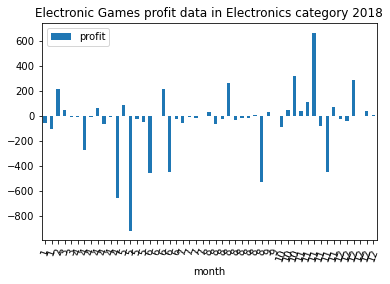

In [109]:
Electronics_Games_2018.plot.bar(x="month", y="profit", rot=70, title="Electronic Games profit data in Electronics category 2018");
plt.rcParams["figure.figsize"] = (15,20.5)

plt.show(block=True);

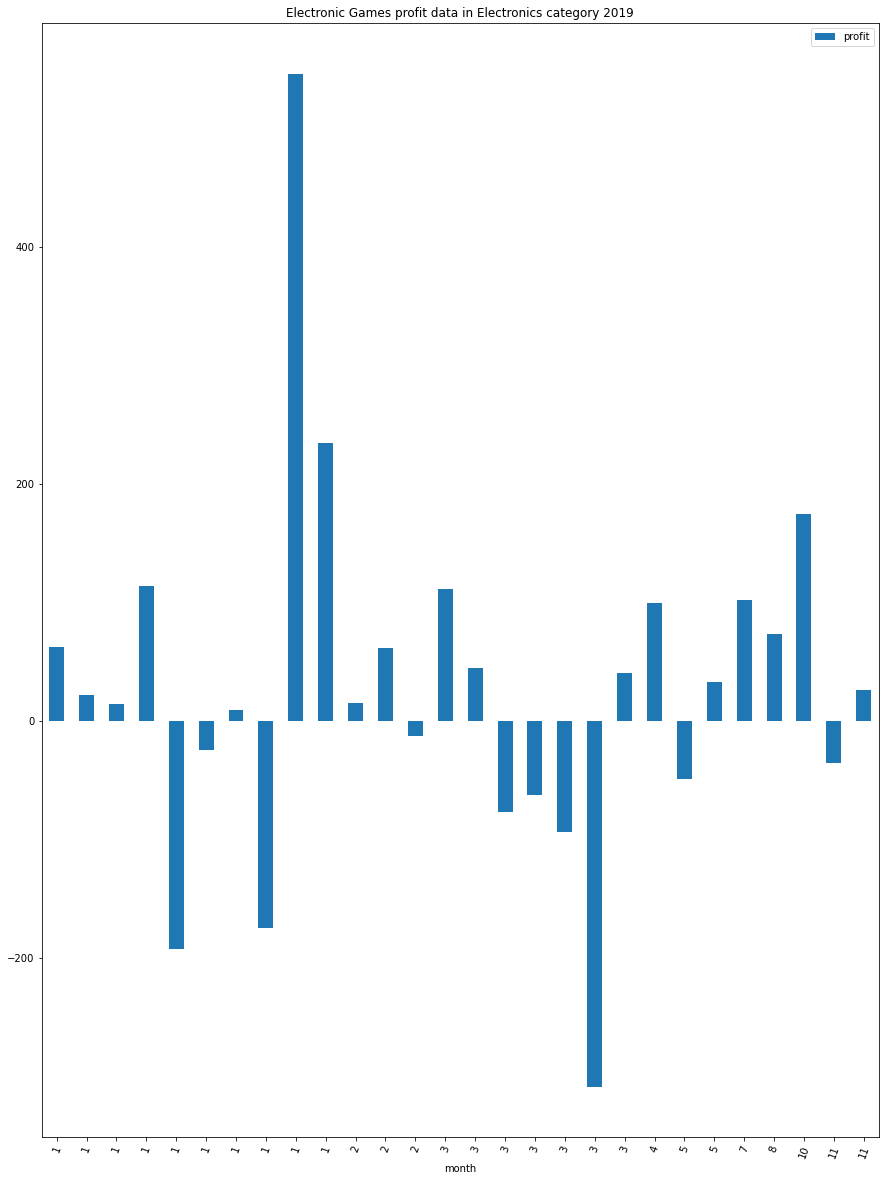

In [110]:
Electronics_Games_2019.plot.bar(x="month", y="profit", rot=70, title="Electronic Games profit data in Electronics category 2019");

plt.show(block=True);

# Category wise current amount analysis (target)

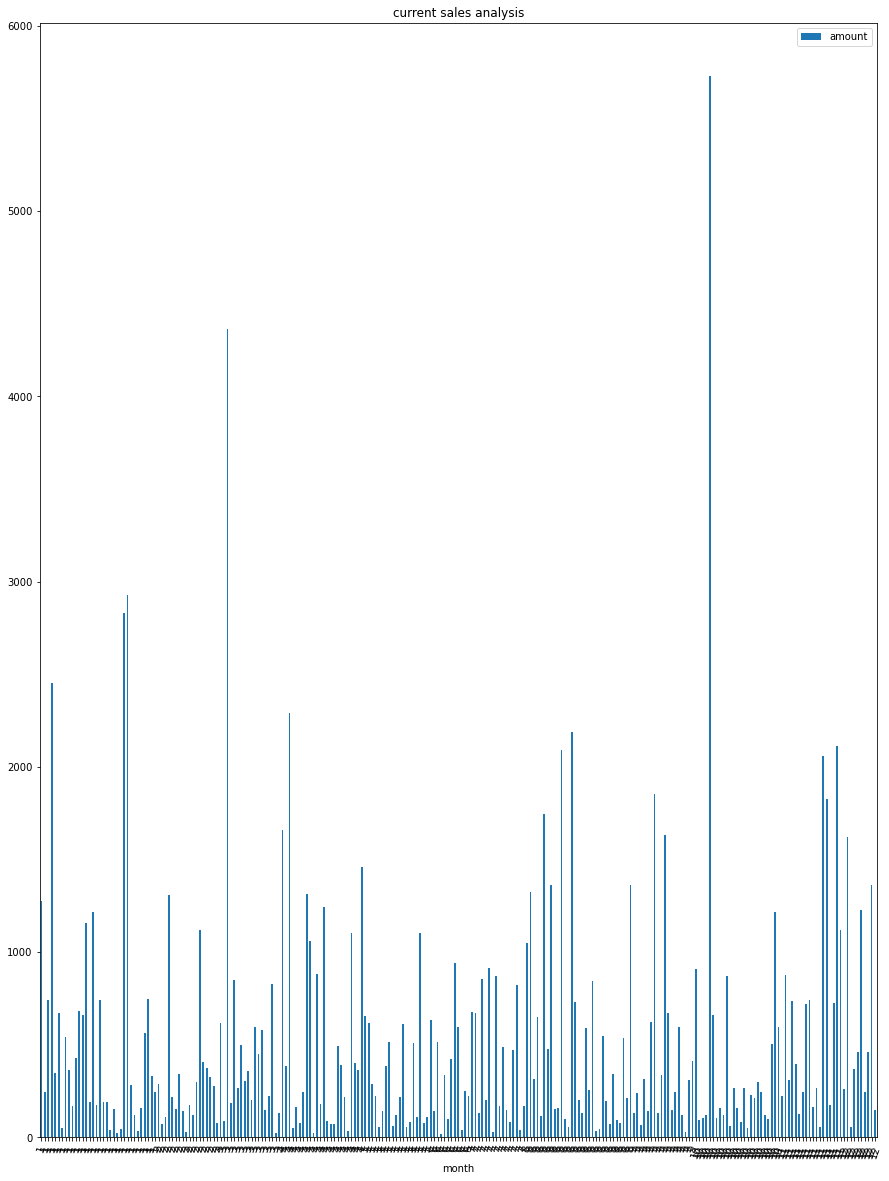

In [111]:
current_amount_furniture = order[order['category'] == 'Furniture']
current_amount_furniture = current_amount_furniture.sort_values('month')

current_amount_furniture.plot.bar(x="month", y="amount", rot=70, title="current sales analysis");
plt.rcParams["figure.figsize"] = (15,20.5)

plt.show(block=True);



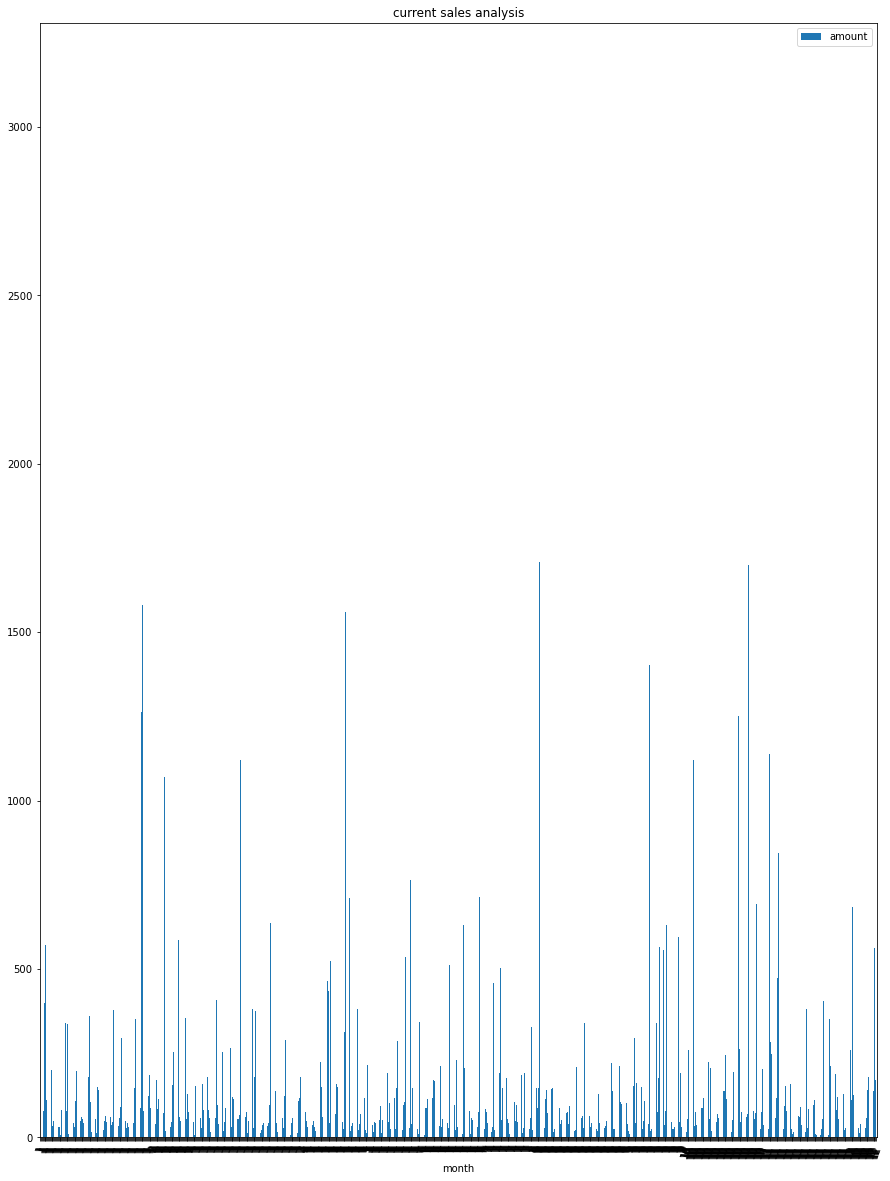

In [112]:
current_amount_clothing = order[order['category'] == 'Clothing']
current_amount_clothing = current_amount_clothing.sort_values('month')

current_amount_clothing.plot.bar(x="month", y="amount", rot=70, title="current sales analysis");
plt.rcParams["figure.figsize"] = (15,20.5)

plt.show(block=True);

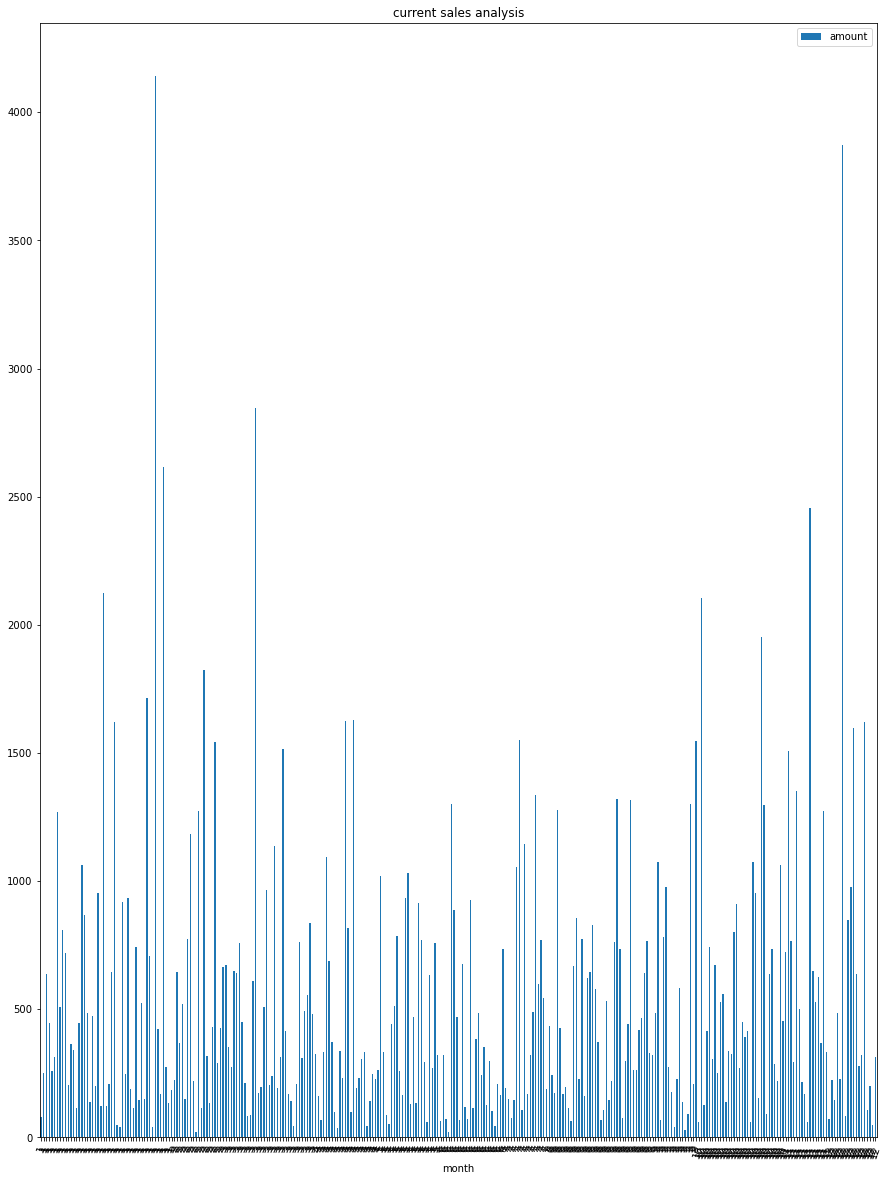

In [113]:
current_amount_Electronics = order[order['category'] == 'Electronics']
current_amount_Electronics = current_amount_Electronics.sort_values('month')

current_amount_Electronics.plot.bar(x="month", y="amount", rot=70, title="current sales analysis");
plt.rcParams["figure.figsize"] = (15,20.5)

plt.show(block=True);